# Natalia Palej A00279259
Software Design with Artificial Intelligence for Cloud Computing, Year 4

# Part 6: Visualizations with Built-in Statistical Features

## Make Necessary Imports

In [406]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

## Read PKL File And Perform Basic Checks

In [407]:
df = pd.read_pickle('data/cleaned_pokemon_data.pkl')

In [408]:
df.head()

,name,national_no,species,ev_yield,catch_rate,base_friendship,base_exp,growth_rate,egg_groups,egg_cycles,...,pokemon_img_url,height_m,weight_kg,primary_type,secondary_type,male_percentage,female_percentage,gen,primary_ability,secondary_ability
0,bulbasaur,1,Seed Pokémon,1 Sp. Atk,45.0,50.0,64,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/bulbasaur.jpg,0.7,6.9,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
1,ivysaur,2,Seed Pokémon,"1 Sp. Atk, 1 Sp. Def",45.0,50.0,142,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/ivysaur.jpg,1.0,13.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
2,venusaur,3,Seed Pokémon,"2 Sp. Atk, 1 Sp. Def",45.0,50.0,236,Medium Slow,"Grass, Monster",20,...,https://img.pokemondb.net/artwork/venusaur.jpg,2.0,100.0,grass,poison,87.5,12.5,1,Overgrow,Chlorophyll
3,charmander,4,Lizard Pokémon,1 Speed,45.0,50.0,62,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmander.jpg,0.6,8.5,fire,Pure,87.5,12.5,1,Blaze,Solar Power
4,charmeleon,5,Flame Pokémon,"1 Sp. Atk, 1 Speed",45.0,50.0,142,Medium Slow,"Dragon, Monster",20,...,https://img.pokemondb.net/artwork/charmeleon.jpg,1.1,19.0,fire,Pure,87.5,12.5,1,Blaze,Solar Power


In [409]:
df.shape

(405, 40)

In [410]:
df.columns

Index(['name', 'national_no', 'species', 'ev_yield', 'catch_rate',
       'base_friendship', 'base_exp', 'growth_rate', 'egg_groups',
       'egg_cycles', 'hp', 'min_hp', 'max_hp', 'attack', 'min_attack',
       'max_attack', 'defense', 'min_defense', 'max_defense', 'sp_atk',
       'min_sp_atk', 'max_sp_atk', 'sp_def', 'min_sp_def', 'max_sp_def',
       'speed', 'min_speed', 'max_speed', 'total', 'evo_path',
       'pokemon_img_url', 'height_m', 'weight_kg', 'primary_type',
       'secondary_type', 'male_percentage', 'female_percentage', 'gen',
       'primary_ability', 'secondary_ability'],
      dtype='object')

## Create Chart

### Define a 5x5 subplot layout

Define 5x5 subplot layout with specific rowspan and colspan for some plots

In [411]:
specs = [
    [{'rowspan': 3, 'colspan': 3},  None, None, None,               {'rowspan': 3, 'colspan': 3}, None,                           None],
    [None,                          None, None, None,               None,                         None,                           None],
    [None,                          None, None, None,               None,                         None,                           None],
    [None,                          None, None, {'type':'domain'},  None,                         None,                           None],
    [{'rowspan': 3, 'colspan': 3},  None, None, None,               {'rowspan': 3, 'colspan': 3}, None,                           None],
    [None,                          None, None, None,               None,                         None,                           None],
    [None,                          None, None, None,               None,                         None,                           None],
]

### Initialize Subplots

Initialize subplots using the defined layout and set titles for each subplot

In [412]:
fig = make_subplots(rows=7, cols=7, specs=specs, horizontal_spacing=0.1, vertical_spacing=0.1,
                    subplot_titles=['Pokémon Total Stat Value over Primary Types', 
                                    'Base Exp Requirements vs Pokémon Strength',
                                    'Pokémon Distributions <br> Over Primary Type<br><br> ',
                                    'Pokémon Height vs Pokémon Weight',
                                    'Pokémon Primary Type - Base Exp<br>Requirements Distribution',])

### Define primary_types colours

In [413]:
primary_type_colours = {
    'grass': '#78C850', 
    'fire': '#F08030', 
    'water': '#6890F0',
    'bug': '#A8B820', 
    'normal': '#A8A878', 
    'poison': '#A040A0',
    'electric': '#F8D030', 
    'ground': '#E0C068', 
    'fairy': '#EE99AC',
    'fighting': '#C03028', 
    'flying': '#A890F0', 
    'psychic': '#F85888',
    'rock': '#B8A038', 
    'ghost': '#705898', 
    'ice': '#98D8D8',
    'dragon': '#7038F8', 
    'dark': '#705848', 
    'steel': '#B8B8D0',
}

## Pokemon Total Stat Value Over Primary Types

Get unique primary types from the data

In [420]:
primary_types = df['primary_type'].unique()

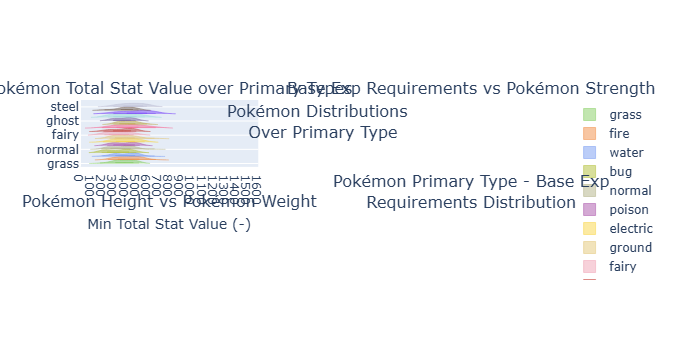

In [414]:
for i, primary_type in enumerate(primary_types):
    # Filter data for current primary type
    type_data = df[df['primary_type'] == primary_type]
     # Add a violin plot for total stat values of this type
    fig.add_trace(
        go.Violin(
            x=type_data['total'], # Total stat values
            y0=primary_type, 
            name=primary_type,
            box_visible=True, # Show box plot inside the violin
            meanline_visible=True, # Show mean line on the violin plot
            line=dict(width=0.5), # Width of the outline of the violin
            side='positive', # Display the violin only on the positive side (0+)
            marker_color=primary_type_colours[primary_type],
            showlegend=True,
            width=2,
            opacity=0.9,
        ),
        row=1, col=1
    )

# Update axes for the first subplot
fig.update_xaxes(showgrid=False, row=1, col=1)
fig.update_yaxes(showgrid=True, row=1, col=1)
fig.update_xaxes(title_text='Min Total Stat Value (-)', range=[0, 1600], dtick=100, row=1, col=1)

## Base Exp Requirements vs Pokemon Strength

Add scatter plot showing base experience against total stats

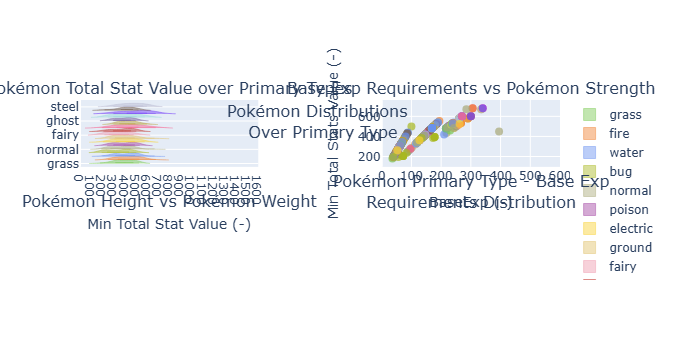

In [415]:
fig.add_trace(
    go.Scatter(
        x=df['base_exp'], # base_exp points 
        y=df['total'], # total stat value for each Pokemon
        mode='markers', # Display data s points 
        # Color markers based on Pokemon type, size of marker and transparency 
        marker=dict(color=df['primary_type'].map(primary_type_colours), size=8, opacity=0.7),
        text=df['name'],
        showlegend=False
    ),
    row=1, col=5
)

fig.update_yaxes(title_text='Min Total Stats Value (-)', showticklabels=True, row=1, col=5)
fig.update_xaxes(title_text='BaseExp (-)', range=[0, 600], dtick=100, row=1, col=5)

## Pokemon Distribution Over Primary Type

Count occurrences of each Pokemon primary type

In [421]:
type_counts = df['primary_type'].value_counts()

Add pie chart for Pokemon types distribution

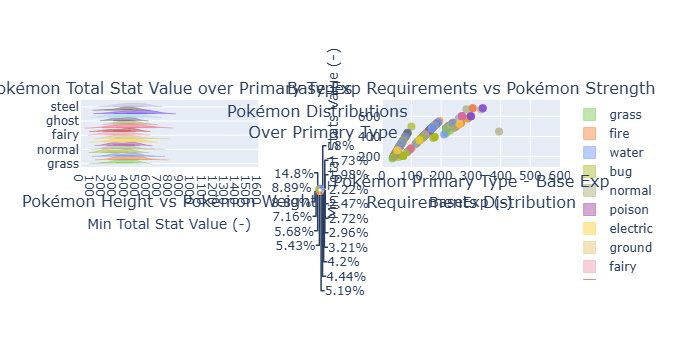

In [416]:
fig.add_trace(
    go.Pie(
        labels=type_counts.index, # Pokemon types
        values=type_counts.values, # Counts for each type 
        # Make donut chart
        hole=0.3,
        # Assign colours based on type 
        marker=dict(colors=[primary_type_colours[type] for type in type_counts.index]),
        showlegend=False
    ),
    row=4, col=4
)

## Pokemon Height vs Pokemon Weight 

Add scatter plot comparing Pokemon height vs weight 

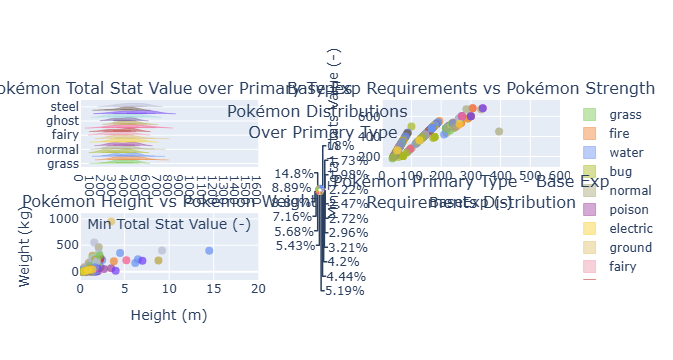

In [417]:
fig.add_trace(
    go.Scatter(
        x=df['height_m'],
        y=df['weight_kg'],
        # Displaying data as markers (points)
        mode='markers',
        marker=dict(
            # Coloring points based on Pokemon type
            color=df['primary_type'].map(primary_type_colours),
            # Marker size
            size=8,
            # Marker transparency 
            opacity=0.7
        ),
        # Show Pokemon name when hoovering over
        text=df['name'],
        # Hide the legend as it is eneded only once (from first plot)
        showlegend=False
    ),
    row=5, col=1
)

fig.update_yaxes(title_text='Weight (kg)', showticklabels=True, row=5, col=1)
fig.update_xaxes(title_text='Height (m)', range=[0, 20], dtick=5, row=5, col=1)

## Pokemon Primary Type - Base Exp Requirements Distribution

Add heatmap for base experience requirements based on Pokemon types

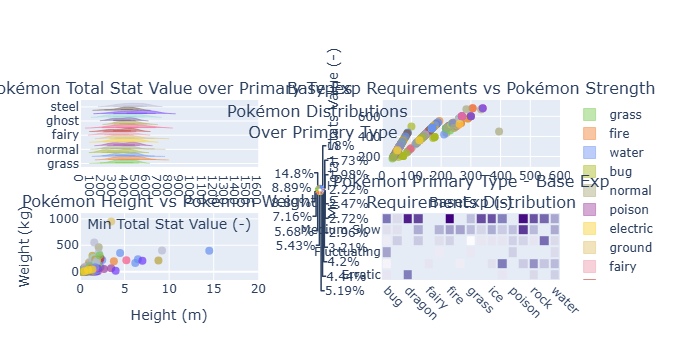

In [418]:
fig.add_trace(
    go.Heatmap(
        # Values from heatmap_data df determine color intensity
        z=heatmap_data.values,
        # X-axis labels are the column names for categories
        x=heatmap_data.columns,
        # Y-axis labels are the index, representing different types
        y=heatmap_data.index,
        colorscale="Purples",
        # Minimum value for scaling based on the dataset
        zmin=heatmap_data.values.min(),
        # Maximum value for scaling based on the dataset
        zmax=heatmap_data.values.max(),
        # Hide the color scale foe better readibility and as per instruction pic
        showscale=False,
        # Adding 2 pixdel gap between x and y axis cells for better readibility 
        xgap=2,
        ygap=2,
    ),
    row=5, col=5
)

# Add horizontal grid lines
# Tickangle adds tilt to x-axis labels
fig.update_xaxes(showticklabels=True, showgrid=False, row=5, col=5, tickangle=45)
fig.update_yaxes(showgrid=False, row=5, col=5)

## Adjust Layout 

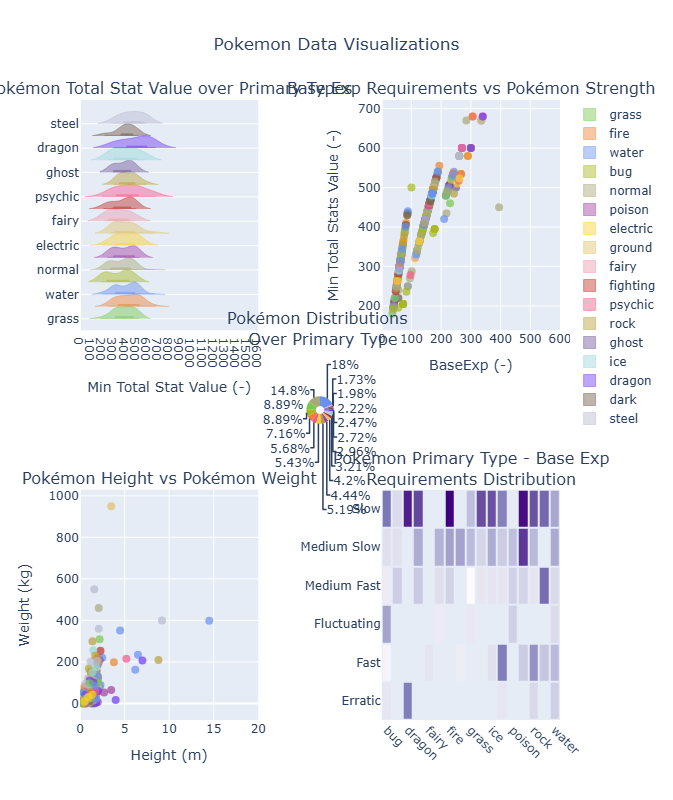

In [419]:
# Update layout and show the figure
fig.update_layout(
    height=800, width=1100,
    title_text="Pokemon Data Visualizations",
    # Center the title 
    title_x=0.5,
    showlegend=True
)

fig.show()